<a href="https://colab.research.google.com/github/YanaSemenenya/INTERPRETATOR/blob/develop/Examples/BaseInterpretator_Regressor_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модель для интепретации

In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

In [3]:
possible_models_list = {
    'xgb':[xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse", ), "boosting"],
    'sklearn_rf':[RandomForestRegressor(n_estimators=1000), 'random_forest'],
    'lgbm': [lgbm.LGBMRegressor(n_estimators=1000), 'boosting']
}

In [4]:
print('Выберите одну из моделей для демонстрации:', list(possible_models_list.keys()))
selected_model = input()
model, selected_algorithm = possible_models_list[selected_model]
_ = model.fit(X,y)

Выберите одну из моделей для демонстрации: ['xgb', 'sklearn_rf', 'lgbm']
xgb


# Интерпретация модели

In [5]:
## Установка необходимых библиотек
#! pip install git+https://github.com/oracle/Skater.git@master
#! pip install git+https://github.com/YanaSemenenya/INTERPRETATOR.git@main
#! pip uninstall yanapy

In [6]:
from yanapy.interpretators.baseinterpretator import BaseInterpretator
my_interpret = BaseInterpretator(model, algorithm=selected_algorithm, objective="regression")
my_interpret.fit_shap()
my_interpret.fit_skater(X)

## Глобальная интерпретация
Интерпретируется модель в целом

### summary_plot
TODO: написать для чего нужен график

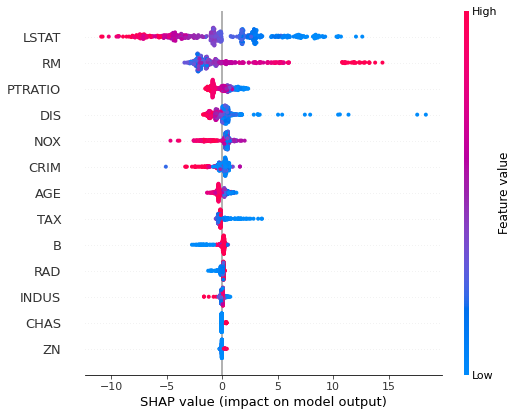

In [7]:
my_interpret.shap(X, type = "summary_plot")

### summary_bar_plot
TODO: написать для чего нужен график

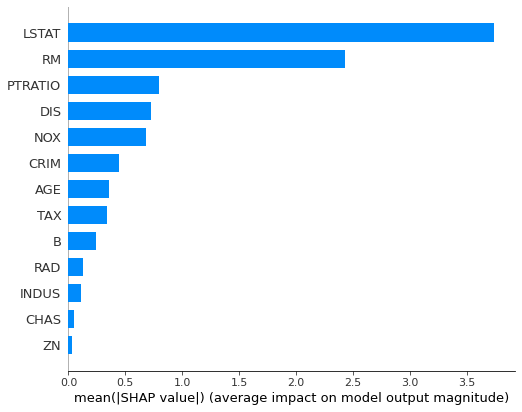

In [8]:
my_interpret.shap(X, type = "summary_bar_plot")

### PDP от одной фичи
Рисует зависимость предсказания модели от двух или одной фичей 

### PDP от двух фичей
Показывает зависимость предсказаний модели от двух фичей

2021-05-21 09:54:32,964 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 7 seconds

[[<Figure size 1152x720 with 2 Axes>,

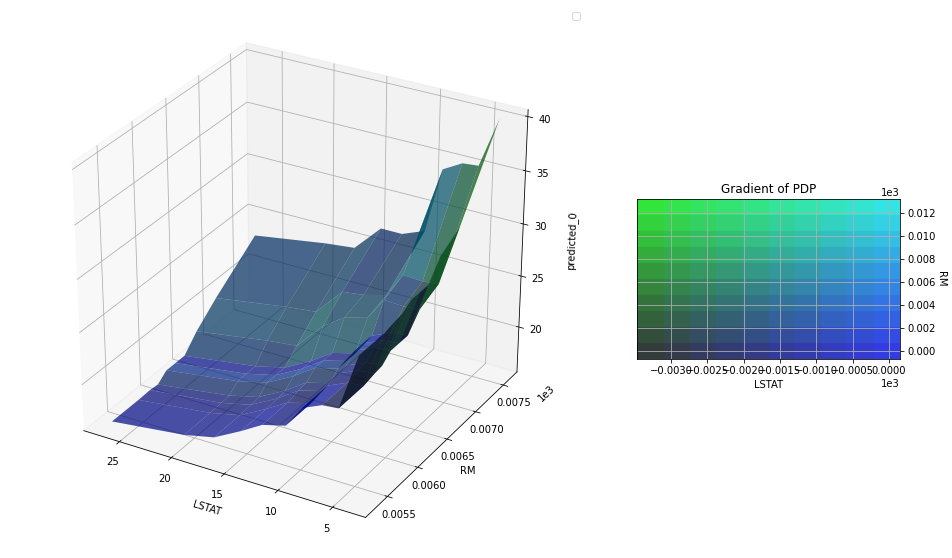

In [9]:
my_interpret.pdp(('LSTAT', 'RM'), grid_resolution=10, n_samples=900)

2021-05-21 09:54:40,769 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 0 seconds

[[<Figure size 1152x720 with 1 Axes>,

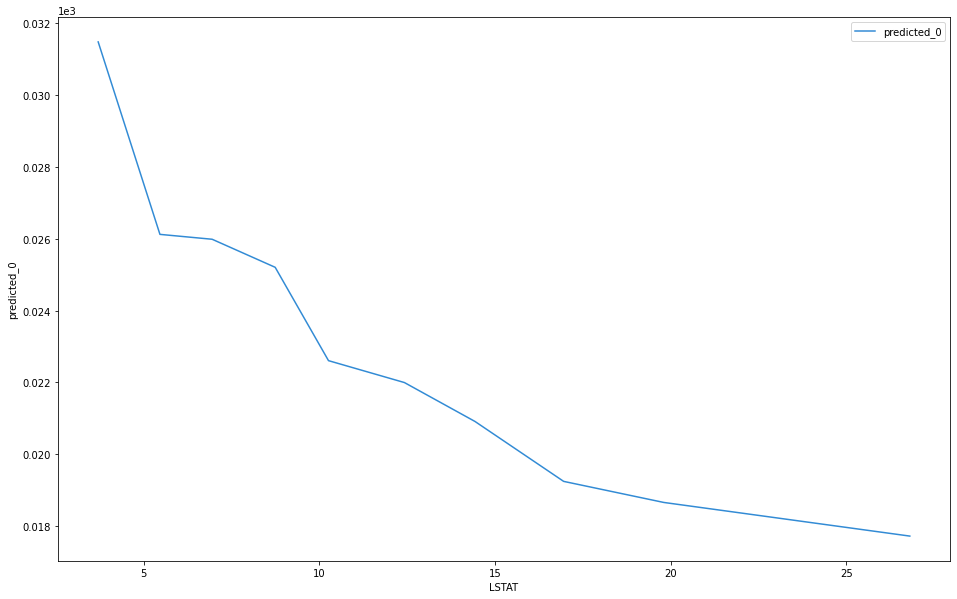

In [10]:
my_interpret.pdp(('LSTAT'), grid_resolution=10, n_samples=900)

### Суррогатное дерево
Апроксимирует ансамбль деревьев одним деревом

2021-05-21 09:54:41,623 - skater.core.global_interpretation.tree_surrogate - INFO - pre pruning applied ...
2021-05-21 09:54:41,626 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used MAE
2021-05-21 09:54:42,076 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (506,)
2021-05-21 09:54:42,078 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 4.602; oracle score 1.19


Impurity score (Difference between original model's and surrogate tree's scores:  -3.412



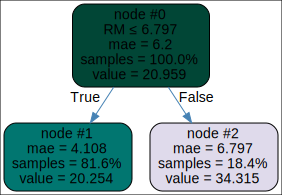

In [11]:
surrogat_tree = my_interpret.get_decision_rules(X, y)
surrogat_tree

## Локальная интерпретация

### SHAP individual plot

In [12]:
my_interpret.shap(X[:1], type = "individual_plot")

### LIME
Не реализовано для регрессоров

In [13]:
my_interpret.lime(X, [12], class_names=None)

BaseException: ignored